In [17]:
!pip install scikit-fuzzy # Install the scikit-fuzzy package

# -*- coding: utf-8 -*-
"""Untitled3.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1blcmoVNldauWo9juO6F0U4CfVQeBbkMp
"""

import numpy as np
import skfuzzy as fuzz # Now skfuzzy can be imported without errors
from skfuzzy import control as ctrl

# Rest of your code remains the same

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.3 MB/s eta 0:00:00


In [18]:
# Define fuzzy variables
jumlah_tugas = ctrl.Antecedent(np.arange(0, 11, 1), 'jumlah_tugas')
waktu_belajar = ctrl.Antecedent(np.arange(0, 11, 1), 'waktu_belajar')
waktu_tidur = ctrl.Antecedent(np.arange(0, 11, 1), 'waktu_tidur')
stres = ctrl.Consequent(np.arange(0, 101, 1), 'stres')

In [19]:
# Membership functions for jumlah_tugas
jumlah_tugas['sedikit'] = fuzz.trimf(jumlah_tugas.universe, [0, 0, 5])
jumlah_tugas['sedang'] = fuzz.trimf(jumlah_tugas.universe, [0, 5, 10])
jumlah_tugas['banyak'] = fuzz.trimf(jumlah_tugas.universe, [5, 10, 10])

In [20]:
# Membership functions for waktu_belajar
waktu_belajar['sebentar'] = fuzz.trimf(waktu_belajar.universe, [0, 0, 5])
waktu_belajar['sedang'] = fuzz.trimf(waktu_belajar.universe, [0, 5, 10])
waktu_belajar['lama'] = fuzz.trimf(waktu_belajar.universe, [5, 10, 10])

In [21]:
# Membership functions for waktu_tidur
waktu_tidur['sedikit'] = fuzz.trimf(waktu_tidur.universe, [0, 0, 5])
waktu_tidur['cukup'] = fuzz.trimf(waktu_tidur.universe, [0, 5, 10])
waktu_tidur['banyak'] = fuzz.trimf(waktu_tidur.universe, [5, 10, 10])

In [22]:
# Membership functions for stres
stres['rendah'] = fuzz.trimf(stres.universe, [0, 0, 50])
stres['sedang'] = fuzz.trimf(stres.universe, [0, 50, 100])
stres['tinggi'] = fuzz.trimf(stres.universe, [50, 100, 100])

In [23]:
# Define fuzzy rules
rule1 = ctrl.Rule(jumlah_tugas['sedikit'] & waktu_belajar['sebentar'] & waktu_tidur['banyak'], stres['rendah'])
rule2 = ctrl.Rule(jumlah_tugas['sedang'] & waktu_belajar['sedang'] & waktu_tidur['cukup'], stres['sedang'])
rule3 = ctrl.Rule(jumlah_tugas['banyak'] & waktu_belajar['lama'] & waktu_tidur['sedikit'], stres['tinggi'])
rule4 = ctrl.Rule(jumlah_tugas['banyak'] & waktu_belajar['lama'] & waktu_tidur['cukup'], stres['tinggi'])
rule5 = ctrl.Rule(jumlah_tugas['sedikit'] & waktu_belajar['lama'] & waktu_tidur['cukup'], stres['sedang'])

In [24]:
# Create and simulate fuzzy control system
stres_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
stres_simulation = ctrl.ControlSystemSimulation(stres_ctrl)

In [25]:
# Input values for simulation
stres_simulation.input['jumlah_tugas'] = 7
stres_simulation.input['waktu_belajar'] = 6
stres_simulation.input['waktu_tidur'] = 4

In [26]:
# Perform computation
stres_simulation.compute()

In [27]:
# Output result
print(f"Prediksi tingkat stres: {stres_simulation.output['stres']:.2f}")

Prediksi tingkat stres: 51.09


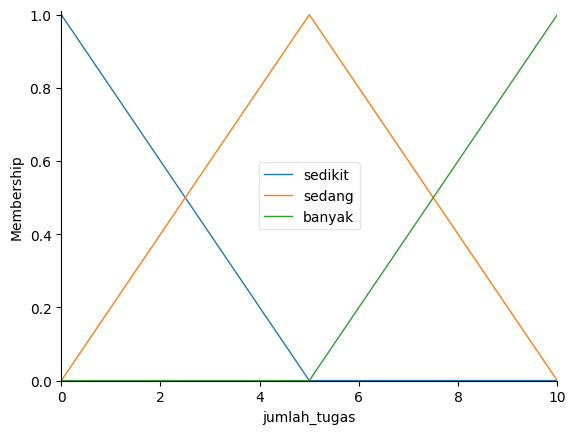

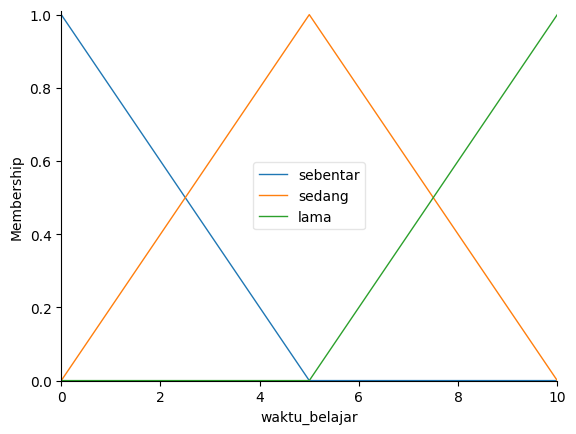

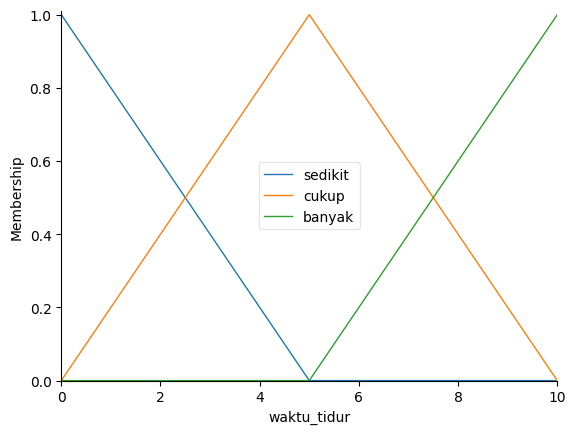

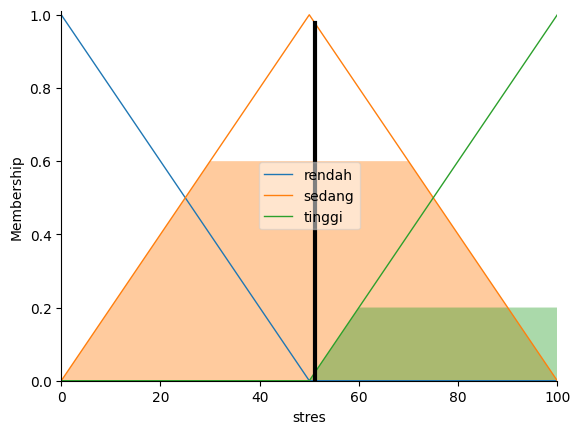

In [28]:
# Visualizations
jumlah_tugas.view()
waktu_belajar.view()
waktu_tidur.view()
stres.view(sim=stres_simulation)